In [3]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

from outlier_detectors import BaseOutlierDetector

# sklearn uses np.random. Keep in mind that np.random is not threadsafe
np.random.seed(3141592)

# Set size of matplotlib plots
plt.rcParams['figure.figsize'] = [14, 8]

In [4]:
# Load the data
X_train = pd.read_csv('data/X_train.csv', index_col='id')
y_train = pd.read_csv('data/y_train.csv', index_col='id')

# Basic analysis

In [10]:
num_samples = X_train.shape[0]
num_features = X_train.shape[1]
print(f"Total number of samples: {num_samples}")
print(f"Total number of features: {num_features}")

Total number of samples: 1212
Total number of features: 832


In [11]:
for column in X_train:
    # Check if the column is completely empty
    if X_train[column].isnull().all():
        print(f"Column {column} has no valid values.")

    # Check if a column has a small number of unique values
    if len(X_train[column].unique()) < 10:
        print(f"Column {column} has only a few unique values: {X_train[column].unique()}")

Column x104 has only a few unique values: [ 0. nan]
Column x129 has only a few unique values: [ 0. nan]
Column x489 has only a few unique values: [ 0. nan]
Column x530 has only a few unique values: [ 0. nan]


In [12]:
for column in X_train:
    # Count the number of invalid values
    print(f"Column {column} has {X_train[column].isnull().sum()} NaN values")

Column x0 has 91 NaN values
Column x1 has 84 NaN values
Column x2 has 88 NaN values
Column x3 has 91 NaN values
Column x4 has 74 NaN values
Column x5 has 79 NaN values
Column x6 has 97 NaN values
Column x7 has 99 NaN values
Column x8 has 83 NaN values
Column x9 has 100 NaN values
Column x10 has 107 NaN values
Column x11 has 78 NaN values
Column x12 has 98 NaN values
Column x13 has 94 NaN values
Column x14 has 78 NaN values
Column x15 has 101 NaN values
Column x16 has 101 NaN values
Column x17 has 98 NaN values
Column x18 has 91 NaN values
Column x19 has 97 NaN values
Column x20 has 96 NaN values
Column x21 has 92 NaN values
Column x22 has 95 NaN values
Column x23 has 90 NaN values
Column x24 has 102 NaN values
Column x25 has 90 NaN values
Column x26 has 86 NaN values
Column x27 has 101 NaN values
Column x28 has 79 NaN values
Column x29 has 100 NaN values
Column x30 has 112 NaN values
Column x31 has 86 NaN values
Column x32 has 83 NaN values
Column x33 has 105 NaN values
Column x34 has 

# Preprocessing

In [13]:
# Outlier detector
outlier_detector = BaseOutlierDetector

# Imputer
imputer = SimpleImputer(strategy='median')
# X_train_imputed = imputer.fit_transform(X_train)

# Scaler
scaler = StandardScaler

array([[14168.82317114, 10514.38071711,  3316.14969762, ...,
         1234.37410932,  1000.78447481,  9285.75127211],
       [17757.03755367, 10839.48307422,  4101.01627264, ...,
         1362.35072623,  1012.62670494, 11750.28476436],
       [14226.65666261, 11029.64249883,  3401.53956164, ...,
          888.35360684,  1048.81038461,  9553.92272836],
       ...,
       [14264.70732077,  9273.40576108,  3580.89400295, ...,
         1781.79972047,  1066.37964726, 10317.75744543],
       [14907.07743999, 10936.63657503,  3159.16778894, ...,
         1300.37967773,  1049.37004045, 10876.0102681 ],
       [14975.96927318, 11451.35034736,  3107.47034339, ...,
         1416.8197132 ,  1088.31559167, 10359.13896926]])

# Outlier detection column-level

### Plot histograms for a random subset of features

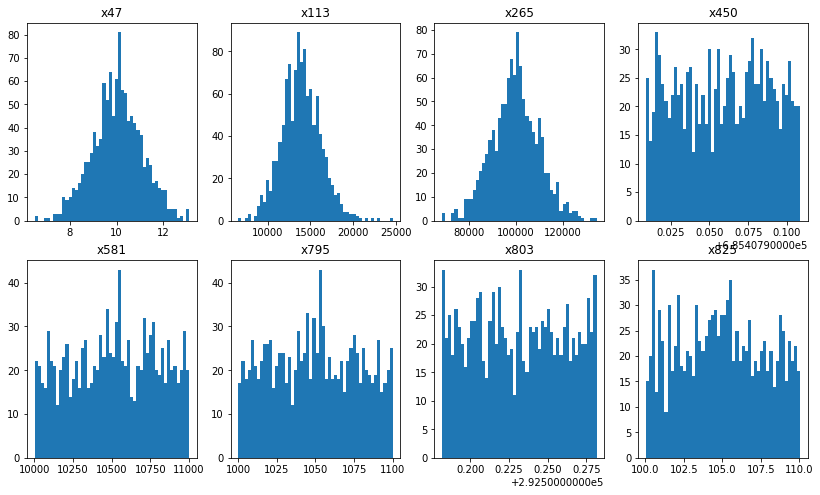

In [9]:
chosen_columns = np.sort(np.random.choice(num_features, 8, replace=False))
for i, column_id in enumerate(chosen_columns):
    ax = plt.subplot(2, 4, i+1)
    ax.set_title(f"{X_train.columns[column_id]}")
    plt.hist(X_train.iloc[:, column_id], bins=50)

plt.show()

# Imputation

In [5]:
imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(X_train)

# Feature Scaling

In [6]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

# Feature selection

Text(0, 0.5, 'cumulative explained variance')

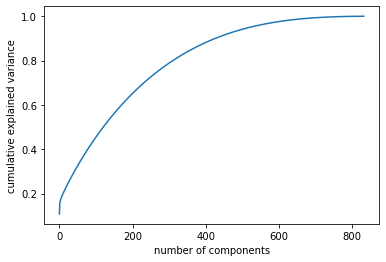

In [7]:
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [8]:
pca = PCA('mle').fit(X_train)
print(pca.n_features_)

832


In [64]:
feature_selector = PCA(n_components=200)
feature_selector.fit(X_train)

columns = [f'pca_{i}' for i in range(200)]
X_train  = pd.DataFrame(feature_selector.transform(X_train), columns=columns)

# Sandbox

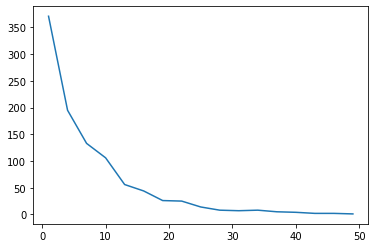

In [ ]:
outlier_detector = IsolationForest(warm_start=True)
outlier_cnt = []
for n_estimators in range(1, 50, 3):
    outlier_detector.set_params(n_estimators=n_estimators) 
    outlier_detector.fit(X_train)
    outlier_cnt.append(sum(outlier_detector.predict(X_train) == -1))
plt.plot(range(1, 50, 3), outlier_cnt)

In [ ]:
outlier_detector = IsolationForest(n_estimators=30)
outlier_detector.fit(X)
inlier = outlier_detector.predict(X) != -1
X = X[inlier]
y = y[inlier]